In [1]:
# Importing Required Libraries
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from glob import glob
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
%matplotlib inline 


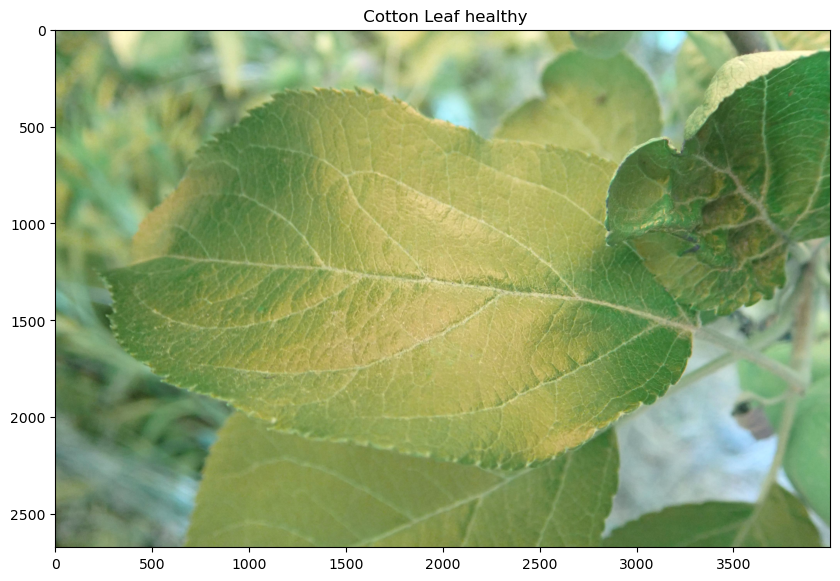

In [2]:
image = cv2.imread('C:\\Users\\Dell\\Desktop\\DEEP\\Test\\Test\\Healthy\\8ddaa5a5caa5caa8.jpg')
plt.figure(figsize=(10,10)) 
plt.title(' Cotton Leaf healthy')
plt.imshow(image)

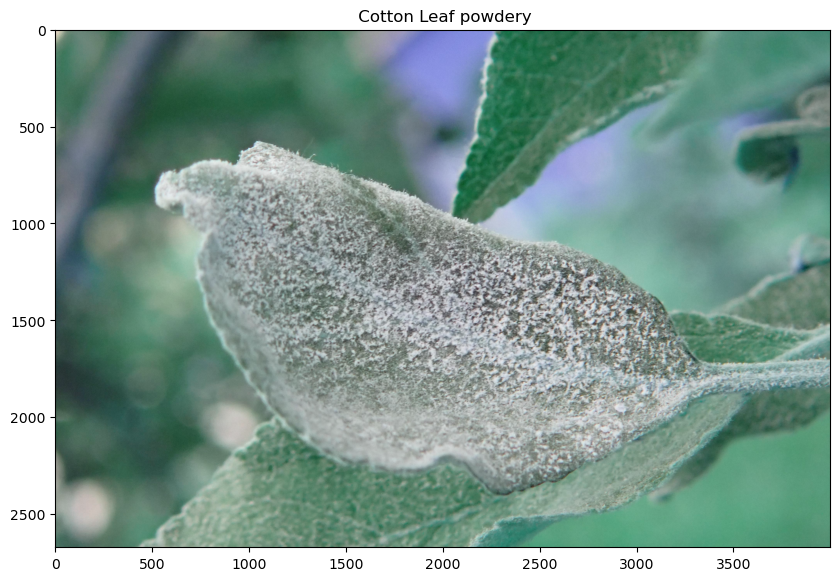

In [3]:
image = cv2.imread('C:\\Users\\Dell\\Desktop\\DEEP\\Train\\Train\\Powdery\\806d7d0df8cae3c2.jpg')
plt.figure(figsize=(10,10)) 
plt.title(' Cotton Leaf powdery')
plt.imshow(image)

In [4]:
train_datagenerator = ImageDataGenerator(rescale = 1.0/255,
                                        shear_range = 0.2,
                                        zoom_range = 0.5,
                                        horizontal_flip = True,
                                        rotation_range=10,
                                        width_shift_range=0.2,
                                        brightness_range=[0.2,1.2]
                                        )
test_datagenerator = ImageDataGenerator(rescale = 1.0/255)

In [5]:
train_data = train_datagenerator.flow_from_directory('Train',
                                                    target_size = (256,256),
                                                    batch_size = 32,
                                                    class_mode = 'categorical')
test_data = test_datagenerator.flow_from_directory('Test',
                                                  target_size = (256,256),
                                                    batch_size = 32,
                                                    class_mode = 'categorical')

Found 1322 images belonging to 1 classes.
Found 150 images belonging to 1 classes.


In [6]:
# CNN Model
cnn = tf.keras.models.Sequential()
# Convolution 
cnn.add(tf.keras.layers.Conv2D(filters=64,padding = "same",kernel_size=3,activation='relu',input_shape=[256,256,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,padding = "same",kernel_size=3,activation='relu'))
# pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
# Convolution
cnn.add(tf.keras.layers.Conv2D(filters=16,padding = "same",kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=16,padding = "same",kernel_size=3,activation='relu'))
#pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

#flaterning
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
# Output layer
cnn.add(tf.keras.layers.Dense(units=4,activation='softmax'))

In [7]:
# Compiling the CNN
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
# Training the CNN on the Training set and evaluating it on the Test set
history = cnn.fit(x = train_data, validation_data = test_data, epochs = 10)

Epoch 1/10
42/42 [==============================] - 902s 21s/step - loss: 13794.8291 - accuracy: 0.0953 - val_loss: 188518.7500 - val_accuracy: 0.0000e+00
Epoch 2/10
42/42 [==============================] - 962s 23s/step - loss: 4925994.0000 - accuracy: 0.2073 - val_loss: 22183620.0000 - val_accuracy: 1.0000
Epoch 3/10
42/42 [==============================] - 850s 20s/step - loss: 306957440.0000 - accuracy: 0.2905 - val_loss: 1092415488.0000 - val_accuracy: 0.0000e+00
Epoch 4/10
42/42 [==============================] - 746s 18s/step - loss: 5556929536.0000 - accuracy: 0.2496 - val_loss: 15507065856.0000 - val_accuracy: 1.0000
Epoch 5/10
42/42 [==============================] - 722s 17s/step - loss: 49620320256.0000 - accuracy: 0.2421 - val_loss: 202620338176.0000 - val_accuracy: 1.0000
Epoch 6/10
42/42 [==============================] - 703s 17s/step - loss: 344420614144.0000 - accuracy: 0.2663 - val_loss: 863180029952.0000 - val_accuracy: 0.0000e+00
Epoch 7/10
42/42 [=================

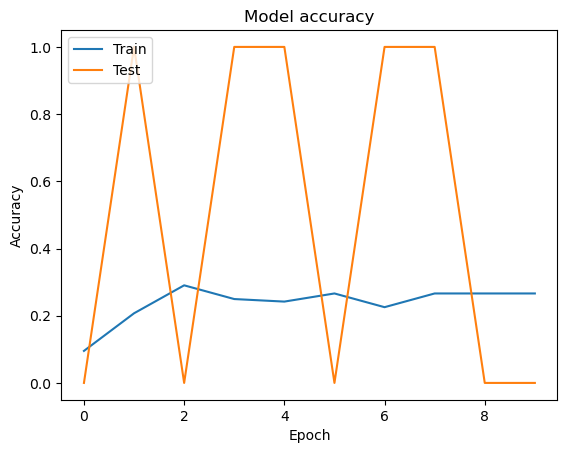

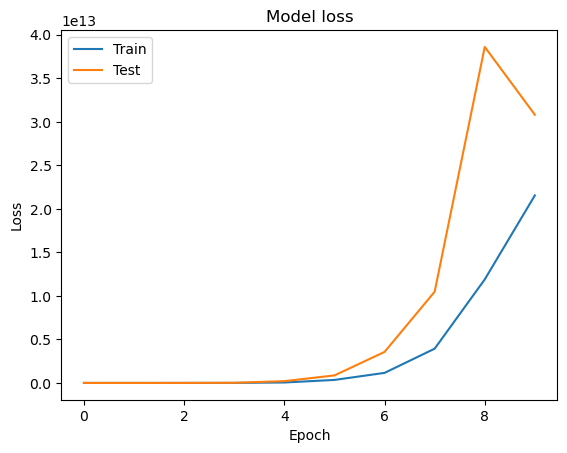

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()